# CEO-REQUEST CHALLENGE

> Should Olist remove underperforming sellers from its marketplace?

## Problem statement

To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

Step ① Compute, for each `seller_id`, and cumulated since the beginning:
- The `revenues` it brings
- The `costs` associated with all its bad reviews
- The resulting `profits` (revenues - costs)
- The number of `orders` (it will impact overall IT costs)


Step ② We can then sort sellers by increasing profits for Olist, and for each number of sellers to remove, compute the financial impact it would have made had they never been accepted on the platform. We may find an optimal number of sellers to remove that maximizes Olist's profit margin

## Information:

### Cost to the company:

| review_score | cost (BRL) | 
| --- | --- | 
| 1 star | 100 | 
| 2 star | 50 | 
| 3 star | 40 | 
| 4 star | 0 | 
| 5 star | 0 | 

**Total cumulated IT Costs** to be proportional to the **square-root** of the total cumulated number of orders approved.<br>
(Estimated: cumulated IT costs have amounted to **500,000 BRL**)

### Income:


•	Olist takes a 10% cut on the product price (excl. freight) of each order delivered.<br>
•	Olist charges 80 BRL by month per seller.<br><br>


In [ ]:
# Write down a detailed strategy (step by step) to create the DataFrame you need for step 1


cost_of_bad_reviews = n_1_star*100 + n_2_star*50 + n_3_star*40
cost_IT_costs = sqrt.(n_orders)

income = 0.10 * sales + 80*months

#Cost Variables
cost_1_star = 100
cost_2_star = 50
cost_3_star = 40

#Income Variables
pct_inc_sales = 0.10
char_month = 80


# Think about how to re-use or update the logic you have already coded in your `olist` package
## I need:

features = ['seller_id','seller_city','seller_state','n_1_star','n_2_star','n_3_star','n_4_star','n_o_star','date_first_sale',
 'date_last_sale','n_orders','quantity','quantity_per_order','sales']

From 'seller':
    features = ['seller_id','seller_city','seller_state','date_first_sale', 'date_last_sale','n_orders','quantity',
                'quantity_per_order','sales'] + ['months']
    
From 'Database':
    features = ['seller_id','n_1_star','n_2_star','n_3_star','n_4_star','n_5_star']

#Seller; number of orders; No 1 star, Nº 2 star, Nº 3 star, Other Star, Start Date, Last Date, Nº months, price 

In [ ]:
#from olist.seller import Seller
#seller = Seller()
#sellers = Seller().get_training_data()
#sellers.head()

<details>
    <summary>Hints</summary>


Starting from your current `seller().get_training_data()` DataFrame:
- Can you easily transform it to compute Olist's positive `revenue_per_seller`? 
- Can you easily transform it to compute Olist's `cost_of_bad_reviews`?

❓Instead of starting again from scratch, investigate your source code in `seller.py` - how was the mean `review_score` per seller computed? Can you imagine a way to amend your code  to compute `cost_of_reviews` in the same process? 
</details>


## Your turn!

In [ ]:
# Keep this notebook tidy, you will present it orally to Olist's CEO at the end of the Communicate topic

In [1]:
import pandas as pd
import numpy as np

from olist.seller import Seller
from olist.order import Order
from olist.data import Olist

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features = ['seller_id','seller_city','seller_state','date_first_sale', 'date_last_sale','n_orders','quantity',
                'quantity_per_order','sales']

#Cost Variables
cost_1_star = 100
cost_2_star = 50
cost_3_star = 40

#Income Variables
pct_incom_sales = 0.10
charg_month = 80

#Get Data
sellers = Seller().get_training_data()
information_df = sellers[features].copy()

orders_reviews = Order().get_review_score()
matching_table = Olist().get_matching_table()

In [3]:
#Calculate Numbers of months that the seller is working with us

information_df['n_months'] = ((information_df.date_last_sale - information_df.date_first_sale)/np.timedelta64(1, 'M'))
information_df['n_months'] = information_df['n_months'].apply(np.ceil)

#Where n_months = 0 --> 1
information_df['n_months'] = np.where(information_df['n_months'] == 0, 1, information_df['n_months'])


features = ['seller_id','seller_city','seller_state','date_first_sale', 'date_last_sale','n_orders','quantity',
                'quantity_per_order','sales', 'n_months']

------------------------------------------------------

In [4]:
#from olist.order import Order
#from olist.data import Olist


#orders_reviews = Order().get_review_score()
#matching_table = Olist().get_matching_table()


matching_table = matching_table[['order_id', 'seller_id']].drop_duplicates()
reviews_df = matching_table.merge(orders_reviews, on='order_id')

reviews_df = reviews_df[['seller_id','review_score']]

#Create new Numbers X stars by Sellers

for stars in range(1, 6, 1):
    reviews_df[f'n_{stars}_star'] = np.where(reviews_df['review_score'] == stars, 1, 0)
    
#Groupby 'Seller' 

reviews_df = reviews_df.groupby('seller_id').sum()
reviews_df.drop(['review_score'], axis=1, inplace=True)

#Create our final DataFrame with ALL the information that we need.
information_df = information_df.merge(reviews_df, on='seller_id')

---------------------------

In [6]:
#cost_of_bad_reviews = n_1_star*100 + n_2_star*50 + n_3_star*40
information_df['cost_of_bad_reviews'] = information_df['n_1_star'] * cost_1_star + information_df['n_2_star'] * cost_2_star + \
information_df['n_3_star'] * cost_3_star 

In [7]:
#Income
information_df['income'] = information_df['n_months'] * charg_month + information_df['sales'] * pct_incom_sales

In [9]:
#P&L
information_df['p_l'] = information_df['income'] - information_df['cost_of_bad_reviews']


-----------------------------------------

In [ ]:
#Pct loose money???

In [27]:
Test = information_df[['seller_id', 'p_l','income','cost_of_bad_reviews', 'n_months']].copy()

In [28]:
Test.sort_values(by=['p_l'], inplace = True, ignore_index = True)

In [38]:
Test.drop(['perc_seller'], axis=1, inplace=True)
Test.insert(0, 'perc_seller', range(1, 1 + len(Test)))
Test['perc_seller'] = Test['perc_seller']/Test['perc_seller'].count()


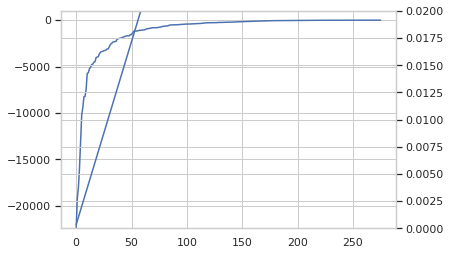

In [79]:


# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(Test[Test['p_l'] < 0]['p_l'])
ax.set_ylim([Test[Test['p_l'] < 0]['p_l'].min(),1000])
ax2=ax.twinx()
ax2.plot(Test[Test['p_l'] < 0]['perc_seller'])
#ax2.yticks([0,0.04])
ax2.set_ylim([0,0.02])
#vals = ax2.get_yticks()
#ax2.set_yticklabels(['{:,.1%}'.format(x) for x in vals])


plt.show()




In [74]:
Test[Test['p_l'] < 0]['p_l'].min()

-22419.517

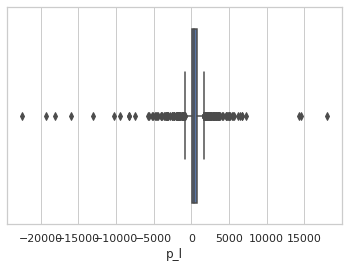

In [25]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x=Test['p_l'])

In [29]:
Test

,seller_id,p_l,income,cost_of_bad_reviews,n_months
0,6560211a19b47992c3666cc44a7e94c0,-22419.517,13850.483,36270,19.0
1,4a3ca9315b744ce9f8e9374361493884,-19242.708,21647.292,40890,20.0
2,cc419e0650a3c5ba77189a1882b7556a,-18051.158,11948.842,30000,19.0
3,ea8482cd71df3c1969d7b9473ff13abc,-15952.248,4757.752,20710,13.0
4,8b321bb669392f5163d04c59e235e066,-13066.431,2553.569,15620,10.0
...,...,...,...,...,...
2965,ccc4bbb5f32a6ab2b7066a4130f114e3,6780.462,9000.462,2220,20.0
2966,edb1ef5e36e0c8cd84eb3c9b003e486d,7288.455,8808.455,1520,11.0
2967,fa1c13f2614d7b5c4749cbc52fecda94,14254.203,21004.203,6750,20.0
2968,7e93a43ef30c4f03f38b393420bc753a,14603.187,19403.187,4800,22.0


In [22]:
Test['p_l'].plot()

1259445.224

In [ ]:
#borrar = information_df.merge(reviews_df, on='seller_id')

In [ ]:
#cost_of_bad_reviews = n_1_star*100 + n_2_star*50 + n_3_star*40
borrar['cost_of_bad_reviews'] = borrar['n_1_star'] * 100 + borrar['n_2_star'] * 50 +  borrar['n_3_star'] * 40 

In [ ]:
borrar

In [ ]:
from olist.seller import Seller

from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)
sellers = seller.get_training_data()
